# Exercice 1

[[ 0.8660254  0.         0.5        0.       ]
 [ 0.         1.         0.         0.       ]
 [-0.5        0.         0.8660254  0.       ]
 [ 0.         0.         0.         1.       ]]
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [-0.  0.  1. -4.]
 [ 0.  0.  0.  1.]]
[[ 1.50e+02  0.00e+00  3.25e+02 -1.30e+03]
 [ 0.00e+00 -1.50e+02  2.50e+02 -1.00e+03]
 [ 0.00e+00  0.00e+00  1.00e+00 -4.00e+00]]
[[ -976.1379332   -910.94555434  -910.94555434  -976.1379332
   -976.1379332  -1689.05444566 -1623.8620668  -1623.8620668
  -1689.05444566 -1689.05444566 -1623.8620668   -910.94555434
   -910.94555434 -1623.8620668  -1689.05444566  -976.1379332 ]
 [-1058.49364905  -808.49364905  -508.49364905  -758.49364905
  -1058.49364905 -1491.50635095 -1241.50635095  -941.50635095
  -1191.50635095 -1491.50635095 -1241.50635095  -808.49364905
   -508.49364905  -941.50635095 -1191.50635095  -758.49364905]
 [   -3.6339746     -2.6339746     -2.6339746     -3.6339746
     -3.6339746     -5.3660254     -4.3660254  

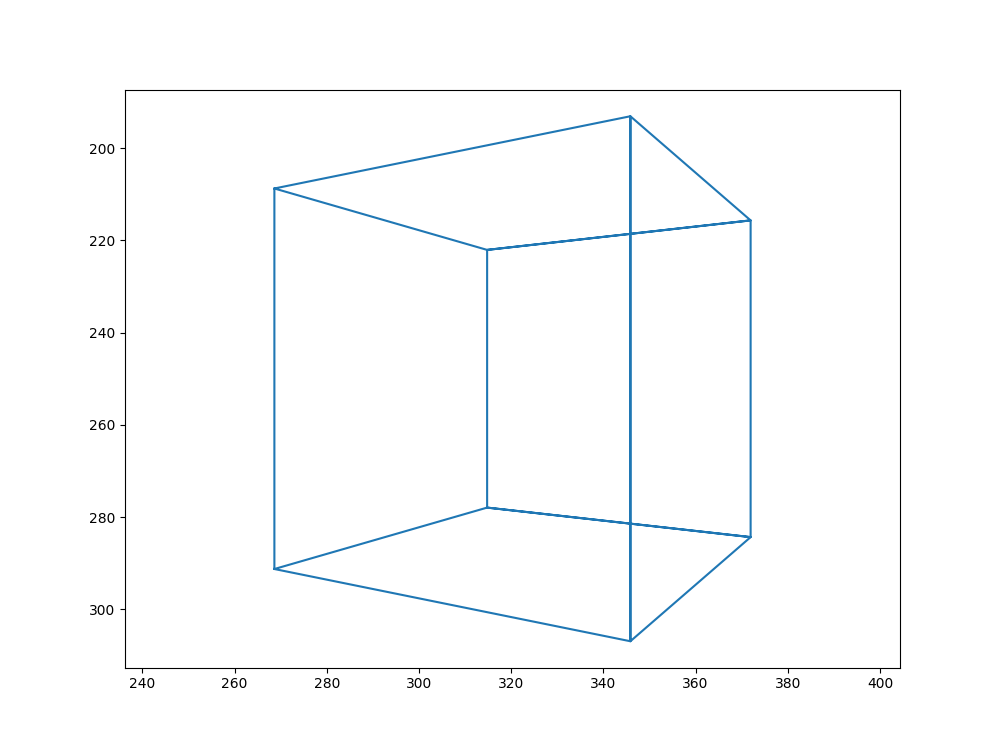

In [1]:
import numpy as np
%matplotlib ipympl
from matplotlib import pyplot as plt
from math import cos, sin, pi

f = 1.5
px = 325
py = 250
m = 100

x = [1, -1, -1,  1, 1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1]
y = [1,  1, -1, -1, 1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1]
z = [1,  1,  1,  1, 1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1]
Xcube = np.array([x, y, z, [1]*16])

alpha = pi/6
Robj = np.array([[ cos(alpha), 0, sin(alpha), 0],
                 [          0, 1,          0, 0],
                 [-sin(alpha), 0, cos(alpha), 0],
                 [          0, 0,          0, 1]])
print(Robj)

theta = 0

R = np.array([[ cos(theta), 0, sin(theta)],
              [          0, 1,          0],
              [-sin(theta), 0, cos(theta)]])

C = np.array([[0],
              [0],
              [-4]])

extrinsic = np.hstack((np.vstack((R, [0, 0, 0])), np.vstack((R @ C, [1]))))

print(extrinsic)

intrinsic = np.array([[m*f,    0, px, 0],
                      [  0, -m*f, py, 0],
                      [  0,    0,  1, 0]])

P = intrinsic @ extrinsic

print(P)

Ximg = P @ Robj @ Xcube
print(Ximg)

xi = Ximg[0, :]/Ximg[2, :]  #prends toutes les colonnes de la 1ère ligne
yi = Ximg[1, :]/Ximg[2, :]  # idem mais 2ème ligne

factor = 2.5 # 1 pouce = 2,5cm
plt.figure(figsize=(4*factor, 3*factor))  # taille de l'image en pouces
plt.axis([0, 640, 480, 0])
# plt.plot([50, 50, 100, 100, 50], [50, 100, 100, 50, 50], "-o")  # "-o" pour traits et cercle
plt.plot(xi, yi)
plt.axis('equal')
plt.show()